In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import

In [4]:
import json
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Loading Annotated Data

In [5]:
data = {}
with open('/content/drive/My Drive/Colab Notebooks/S12/dog_full_annotations_coco.json') as f:
    annotationData = json.load(f)
    imageInfo = annotationData['images']
    annotationInfo = annotationData['annotations']

# Parsing Data

In [6]:
# Saving image data in dict for easy access
imageData = {}
for i in imageInfo:
    imageData[i['id']] = {}
    imageData[i['id']]['height'] = i['height']
    imageData[i['id']]['width'] = i['width']

# Running through annotation information. Note : Some images have more than one bounding box, and they are separate entity in annotations
for i in range(len(annotationInfo)):
    data[i] = {}
    data[i]['image_id'] = annotationInfo[i]['image_id']
    data[i]['width'] = imageData[annotationInfo[i]['image_id']]['width']
    data[i]['height'] = imageData[annotationInfo[i]['image_id']]['height']
    data[i]['bbox_x'] = annotationInfo[i]['bbox'][0]
    data[i]['bbox_y'] = annotationInfo[i]['bbox'][1]
    data[i]['bbox_cx'] = annotationInfo[i]['bbox'][2]/2   # centroid x = bboox_width/2
    data[i]['bbox_cy'] = annotationInfo[i]['bbox'][3]/2   # centroid y = bboox_height/2
    data[i]['bbox_width'] = annotationInfo[i]['bbox'][2]
    data[i]['bbox_height'] = annotationInfo[i]['bbox'][3]

# Normalizing Data

In [16]:
df = pd.DataFrame.from_dict(data, orient='index')
df['N_bbox_x'] = df['bbox_x']/df['width']
df['N_bbox_y'] = df['bbox_y']/df['height']
df['N_bbox_cx'] = df['bbox_cx']/df['width']
df['N_bbox_cy'] = df['bbox_cy']/df['height']
df['N_bbox_width'] = df['bbox_width']/df['width']
df['N_bbox_height'] = df['bbox_height']/df['height']

print(df.head())

   image_id  width  height  ...  N_bbox_cy  N_bbox_width  N_bbox_height
0        48    318     159  ...   0.493711      0.808176       0.987421
1        43    284     177  ...   0.480226      0.834507       0.960452
2        42    225     225  ...   0.462222      0.573333       0.924444
3        50    275     183  ...   0.346995      0.225455       0.693989
4        50    275     183  ...   0.409836      0.287273       0.819672

[5 rows x 15 columns]


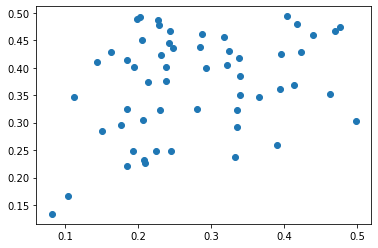

In [18]:
plt.scatter(df['N_bbox_cx'], df['N_bbox_cy'])

# Finding Optimal K using Elbow method

In [19]:
import numpy as np
X = np.array(list(zip(df['N_bbox_cx'], df['N_bbox_cy'])))

wcss = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss.append(model.inertia_)

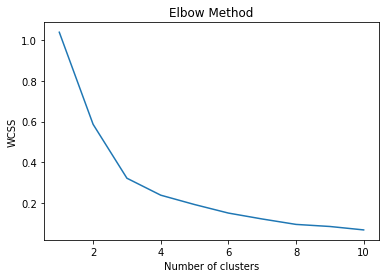

In [20]:
plt.plot(K, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Using Optimal K in K-Means

In [21]:
#Optimal K found to be 3 from above method
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

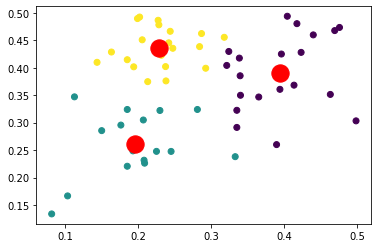

In [22]:
plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='viridis')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='red', s=300)